In [1]:
#importing the files
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

#reading the csv file
df=pd.read_csv("outputd0315.csv")


In [2]:
df.describe()

,average insect count,"Dew Point, *C, WEASN17 Osmia 2023","Gust Speed, m/s, WEASN17 Osmia 2023","RH, %, WEASN17 Osmia 2023 Air humidity","Temperature, *C, WEASN17 Osmia 2023 AIr temperature","Rain, mm, WEASN17 Osmia 2023 Precipitation","Solar Radiation, W/m^2, WEASN17 Osmia 2023 Radiation","Wind Speed, m/s, WEASN17 Osmia 2023 Wind speed"
count,613.000000,613.000000,613.000000,613.000000,613.000000,613.000000,613.000000,613.000000
mean,2.597738,12.042825,0.664356,71.757961,17.670140,0.008157,310.476183,0.093638
std,1.496624,2.957216,0.644095,16.750641,4.590821,0.063524,275.656504,0.169824
min,0.125000,5.412000,0.000000,35.370000,8.276000,0.000000,1.000000,0.000000
25%,1.504587,9.936000,0.000000,60.340000,13.804000,0.000000,66.700000,0.000000
50%,2.089888,12.586000,0.500000,68.690000,17.374000,0.000000,243.200000,0.000000
75%,3.469388,13.887000,1.150000,87.660000,21.377000,0.000000,495.300000,0.100000
max,9.186047,20.500000,3.350000,99.100000,27.273000,0.860000,927.200000,1.250000


In [3]:
X=df.iloc[:,4:11] #environmental features attributes
X.drop(columns=['Rain, mm, WEASN17 Osmia 2023 Precipitation'], inplace=True) 

y=df.iloc[:, 2].values   #average insect count

In [4]:
#Preparing the data for the training
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [5]:
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(490, 6) (123, 6) (490,) (123,)


In [6]:
#Random Forest Model
from sklearn.ensemble import RandomForestRegressor

In [7]:
regressor = RandomForestRegressor(n_estimators = 20,random_state=0 )
ll_rf=regressor.fit(X_train,y_train)
y_pred=regressor.predict(X_test)

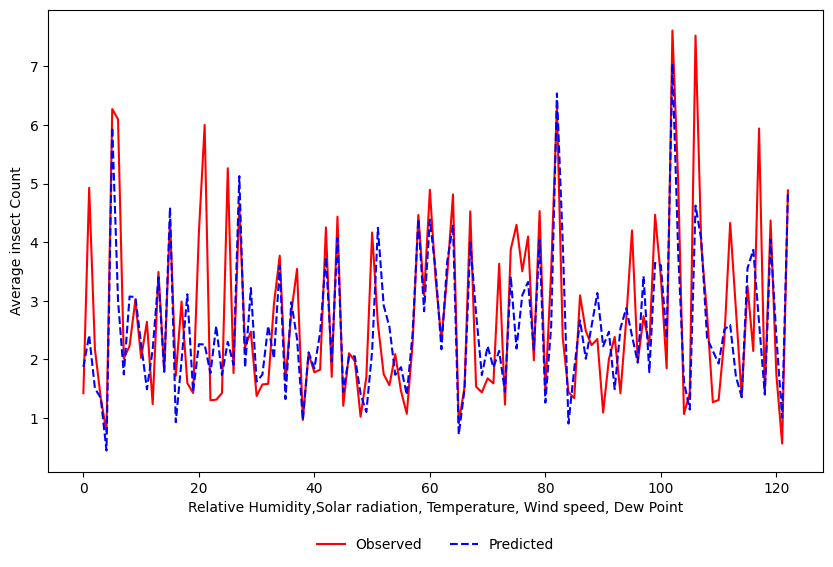

In [8]:
plt.rcParams['figure.figsize'] = (10, 6)
x_ax = range(len(X_test))
plt.plot(x_ax, y_test, label="Observed", color="red", linestyle='-')
plt.plot(x_ax, y_pred, label="Predicted", color="blue", linestyle='--')

plt.ylabel('Average insect Count')
plt.xlabel('Relative Humidity,Solar radiation, Temperature, Wind speed, Dew Point')

plt.legend(bbox_to_anchor=(0.5, -0.2), loc='lower center', ncol=2, frameon=False)
plt.show()


c:\Users\JRF_Awadh\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


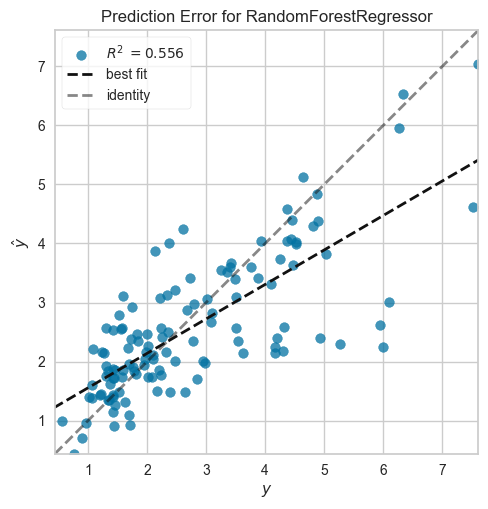

<Axes: title={'center': 'Prediction Error for RandomForestRegressor'}, xlabel='$y$', ylabel='$\\hat{y}$'>

In [9]:
from yellowbrick.regressor import PredictionError

visualizer=PredictionError(ll_rf)
visualizer.fit(X_train,y_train)
visualizer.score(X_test,y_test)
visualizer.poof()


c:\Users\JRF_Awadh\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


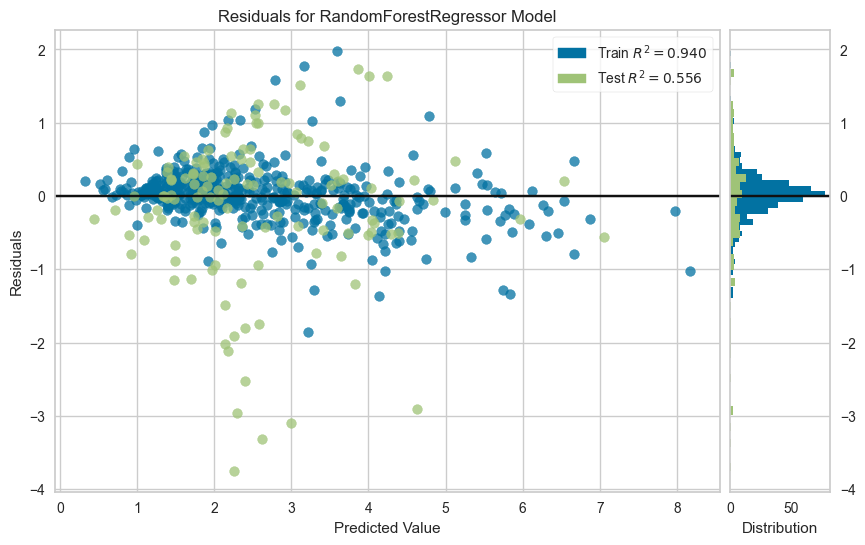

In [10]:
from matplotlib import pyplot as plt
from yellowbrick.regressor import residuals_plot

plt.rcParams['figure.figsize'] = (10, 6)

# Your code for model training and prediction

 #Plotting the residuals
residuals_plot(regressor, X_train, y_train, X_test, y_test)

plt.show()


In [11]:
from sklearn.metrics import r2_score

# Assuming you have already trained the Random Forest Regressor model
y_train_pred = regressor.predict(X_train)  # Replace rf_regressor with your trained model variable

# Calculate the R2 score for the training dataset
r2_train = r2_score(y_train, y_train_pred)  # Replace y_train with your actual target values for the training dataset

print("R2 Score (Training):", r2_train*100 ,"%")


R2 Score (Training): 94.00952271092791 %


In [12]:
# Assuming you have a trained regression model named 'model'

# Take input from the user
input_data = {}
num_features = len(X_train.columns)  # Replace X_train with your training data
for column in X_train.columns:
    value = float(input(f"Enter value for {column}: "))
    input_data[column] = [value]

# Create a DataFrame from the input data
input_df = pd.DataFrame(input_data)

# Make prediction using the trained model
prediction =regressor.predict(input_df)

print("Predicted value:", prediction[0])
